In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

from constants import DATA_DIR

In [5]:
def hist_query(table, col, rnd=2):
    return f"""
        SELECT count(*), ROUND({col}, {rnd})
        FROM {table}
        GROUP BY ROUND({col}, {rnd});
        """

In [3]:
db_path = DATA_DIR / 'perspective-responses-v2.db'
engine = create_engine(f'sqlite:///{db_path}', echo=False)

## Documents

In [6]:
docs_df = pd.read_sql(hist_query('responses', 'toxicity'), con=engine)

(0, 1)

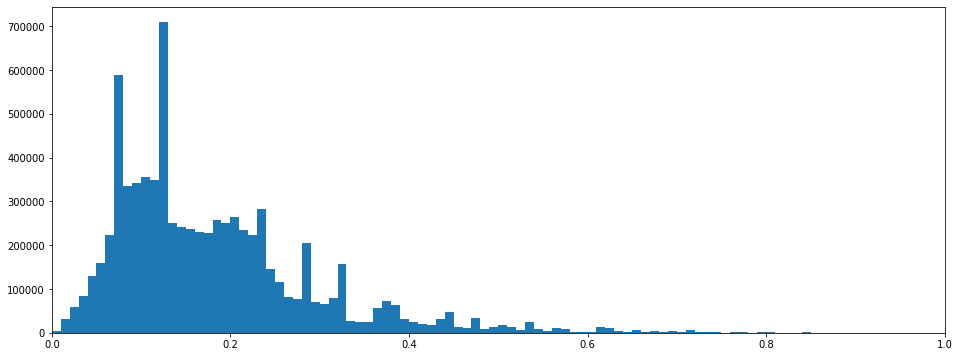

In [95]:
y, x = docs_df.values.T
plt.figure(figsize=(16, 6))
plt.hist(x, bins=x, weights=y)
plt.xlim(0, 1)

## Spans

In [ ]:
spans_df = pd.read_sql(hist_query('span_scores', 'toxicity'), con=engine)

(0, 1)

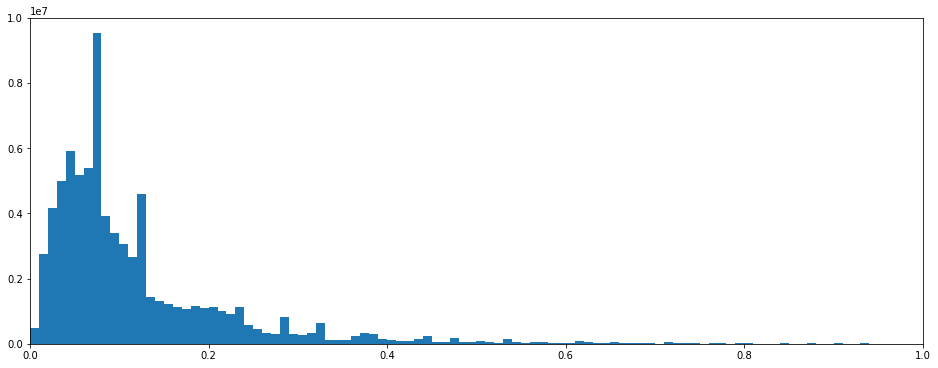

In [96]:
y, x = spans_df.values.T
plt.figure(figsize=(16, 6))
plt.hist(x, bins=x, weights=y)
plt.xlim(0, 1)